# Introduction
The bike has 20 gears which are the categories/labels of the classification. Features are cadence and speed with data of the trainings app. We train our model with data sets of all 20 gears (means 20 tcx files loaded with labeled oberservations).

In [12]:
from sklearn.model_selection import train_test_split
from src.regression import validate_lin_reg
from src.tcx import Tcx, COLUMN_NAME_SPEED, COLUMN_NAME_WATTS, COLUMN_NAME_CADENCE
from src.test_data import TrainDataSet
from src.visu import plot2d
import matplotlib.pyplot as plt


tcx_app_gear7: Tcx = Tcx.read_tcx(file_path='test/tcx/cadence_1612535177298-gear7.tcx')
tcx_app_gear20: Tcx = Tcx.read_tcx(file_path='test/tcx/cadence_1612535671464-gear20.tcx')
tcx_tacx_gear7: Tcx = Tcx.read_tcx(file_path='test/tcx/tacx-activity_6225123072-gear7-resistance3.tcx')
tcx_tacx_gear20: Tcx = Tcx.read_tcx(file_path='test/tcx/tacx-activity_6225123072-gear7-resistance3.tcx')

# generate test data
dts_gear7: TrainDataSet = TrainDataSet(tcx_app_gear7)
dts_gear20: TrainDataSet = TrainDataSet(tcx_app_gear20)
dts_tacx_gear7: TrainDataSet = TrainDataSet(tcx_tacx_gear7)

# Problem
Find cadence for a gear that the tacx data set is of. the app data will measure speed and a linear regression model of the same gear predicts the cadence by that speed. A second linear regression model maps cadence to power of the tacx data set.

# Solution
## Train (app data)
* X of of gear _n_ in app data set: [speed]
* Y -> [cadence]

### Linear model

In [13]:
from sklearn.linear_model import LinearRegression

X_train, y_train = dts_gear7.cadence_to_speed()
lr_app_gear7 = LinearRegression().fit(X_train, y_train)

## Train (tacx)
* X of of gear _n_ in app data set: [cadence]
* Y -> [power]

### Analyze
Let us first plot the features to see which regression model fits best

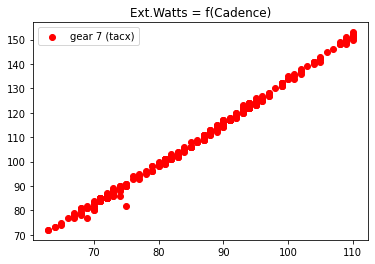

In [14]:
X, y = dts_tacx_gear7.cadence_to_power()
plot2d(X.iloc[:,0], y, point_color='red', legend_label='gear 7 (tacx)')
plt.show()

### Linear model

In [15]:
from sklearn.linear_model import LinearRegression

lr_tacx_gear7 = LinearRegression().fit(X, y)

### Validation
Cross validation with X_test of tacx data and validate the score of the predicted values

In [16]:
random_state = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_state)
validate_lin_reg(X_train, y_train, X_test, y_test, LinearRegression())




Shape X_train/X_test: (357, 1)/(90, 1)
Error R²: 1.00
MSE error (mean squared error / variance): 1.06
sqrt(MSE) (standard deviation): 1.03
Max error: 2.8912017526499483
estimator.coefficients: [1.70889424]
Cross validation: [0.99506023 0.99816251 0.9957887  0.99589043 0.99734035]
